In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Cricket.csv',encoding='latin')

In [4]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
df.info() #we need to convert objects to numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [7]:
df.duplicated().sum()

0

In [9]:
df[['start','end']]=df['Span'].str.split('-',expand=True)
#expand gives 3 values rather than returning the list hence the values will be stored in resepctive cols
df['start']=df['start'].astype(int)
df['end']=df['end'].astype(int)

In [10]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,start,end
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [13]:
df['Exp']=df['end']-df['start']

In [16]:
df.drop(["start","end","Span"],axis=1,inplace=True)

In [17]:
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [22]:
#Here HS is object hence need to be converted to numerical
df['HS']=df['HS'].str.replace('*','')
df.head()
df['HS']=df['HS'].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 7.5+ KB


In [24]:
df.head()
#Now all the columns are according to required data type

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


Text(0.5, 1.0, '0')

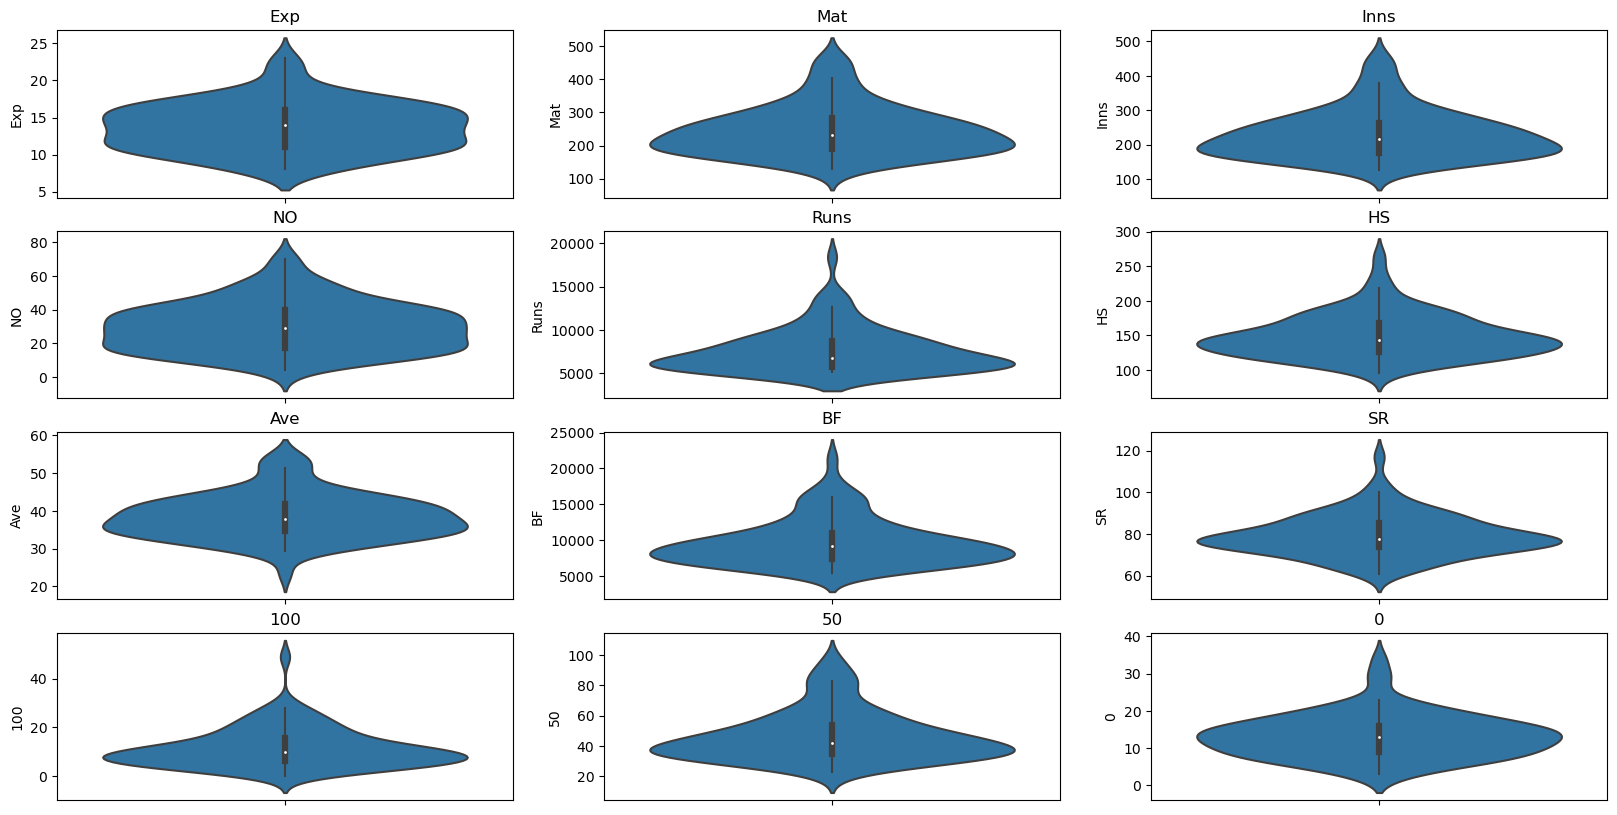

In [28]:
f,axes=plt.subplots(4,3,figsize=(20,10))
s=sns.violinplot(y=df.Exp,ax=axes[0,0])
axes[0,0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0,1])
axes[0,1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0,2])
axes[0,2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1,0])
axes[1,0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1,1])
axes[1,1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1,2])
axes[1,2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2,0])
axes[2,0].set_title('Ave')
s=sns.violinplot(y=df.BF,ax=axes[2,1])
axes[2,1].set_title('BF')
s=sns.violinplot(y=df.SR,ax=axes[2,2])
axes[2,2].set_title('SR')

s=sns.violinplot(y=df['100'],ax=axes[3,0])
axes[3,0].set_title('100')
s=sns.violinplot(y=df['50'],ax=axes[3,1])
axes[3,1].set_title('50')
s=sns.violinplot(y=df['0'],ax=axes[3,2])
axes[3,2].set_title('0')


In [32]:
#replacement of outliers

for i in df.columns:
  if df[i].dtype!='object':
    p1=df[i].quantile(0.01)
    p2=df[i].quantile(0.99)

    df[i][df[i]<p1]=p1
    df[i][df[i]>p2]=p2

        

C:\Users\Anirudh\AppData\Local\Temp\ipykernel_8012\2316744318.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<p1]=p1
C:\Users\Anirudh\AppData\Local\Temp\ipykernel_8012\2316744318.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>p2]=p2
C:\Users\Anirudh\AppData\Local\Temp\ipykernel_8012\2316744318.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<p1]=p1
C:\Users\Anirudh\AppData\Local\Temp\ipyk

In [33]:
df_drop=df.copy()

In [34]:
df_drop.drop(['Player'],axis=1,inplace=True)

In [35]:
df_drop

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,448.7260,433.9196,41.0,14436.8928,200.0000,44.83,18208.6396,86.23,30.9196,93.1452,20.0000,22.0484
1,404.0000,380.0000,41.0,14234.0000,169.0000,41.98,18048.0000,78.86,25.0000,93.0000,15.0000,15.0000
2,375.0000,365.0000,39.0,13704.0000,164.0000,42.03,17046.0000,80.39,30.0000,82.0000,20.0000,17.0000
3,445.0000,433.0000,18.0,13430.0000,189.0000,32.36,14725.0000,91.20,28.0000,68.0000,30.1936,22.0000
4,448.0000,418.0000,39.0,12650.0000,144.0000,33.37,16020.0000,78.96,19.0000,77.0000,28.0000,17.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
74,145.1288,142.2256,13.0,5134.0000,133.0000,45.03,7908.0000,64.92,11.0000,31.0000,3.0000,16.0000
75,162.0000,149.0000,31.0,5122.0000,101.7096,43.40,6945.0000,73.75,1.9032,42.0000,6.0000,13.0000
76,197.0000,181.0000,37.0,5092.0000,120.0000,35.36,6614.0000,76.98,5.0000,26.0000,7.0000,10.0000
77,198.0000,161.0000,33.0,5088.0000,156.0000,39.75,5916.9944,92.44,6.0000,30.0000,15.0000,11.0000


In [36]:
from sklearn.preprocessing import StandardScaler


In [37]:
scaler=StandardScaler()

In [38]:
df_scaled=scaler.fit_transform(df_drop)

In [39]:
df_scaled

array([[ 2.79305063e+00,  2.95194947e+00,  7.73975516e-01,
         2.91933452e+00,  1.70689600e+00,  1.09076021e+00,
         2.81860402e+00,  7.58692670e-01,  2.73735660e+00,
         2.90235725e+00,  1.18552391e+00,  2.55225549e+00],
       [ 2.17952683e+00,  2.16945690e+00,  7.73975516e-01,
         2.83310671e+00,  6.69366758e-01,  5.92555340e-01,
         2.76570265e+00, -3.36564450e-02,  1.90924221e+00,
         2.89333363e+00,  3.13175993e-01,  3.88416037e-01],
       [ 1.78172264e+00,  1.95177375e+00,  6.32454183e-01,
         2.60786097e+00,  5.02023332e-01,  6.01295777e-01,
         2.43572688e+00,  1.30833941e-01,  2.60871041e+00,
         2.20972653e+00,  1.18552391e+00,  1.00241055e+00],
       [ 2.74193965e+00,  2.93860404e+00, -8.53519821e-01,
         2.49141317e+00,  1.33874046e+00, -1.08910460e+00,
         1.67138183e+00,  1.29301765e+00,  2.32892313e+00,
         1.33968113e+00,  2.96399704e+00,  2.53739683e+00],
       [ 2.78309181e+00,  2.72092089e+00,  6.3245418

In [40]:
#now we cant give array as input to model hence we will make it dataframe

df_scaled=pd.DataFrame(df_scaled,columns=df_drop.columns)

In [41]:
df_scaled

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.793051,2.951949,0.773976,2.919335,1.706896,1.090760,2.818604,0.758693,2.737357,2.902357,1.185524,2.552255
1,2.179527,2.169457,0.773976,2.833107,0.669367,0.592555,2.765703,-0.033656,1.909242,2.893334,0.313176,0.388416
2,1.781723,1.951774,0.632454,2.607861,0.502023,0.601296,2.435727,0.130834,2.608710,2.209727,1.185524,1.002411
3,2.741940,2.938604,-0.853520,2.491413,1.338740,-1.089105,1.671382,1.293018,2.328923,1.339681,2.963997,2.537397
4,2.783092,2.720921,0.632454,2.159919,-0.167350,-0.912548,2.097848,-0.022905,1.069880,1.898996,2.581281,1.002411
...,...,...,...,...,...,...,...,...,...,...,...,...
74,-1.371509,-1.281175,-1.207323,-1.034320,-0.535506,1.125722,-0.573573,-1.532347,-0.049269,-0.959725,-1.780459,0.695413
75,-1.140081,-1.182864,0.066369,-1.039420,-1.582754,0.840784,-0.890705,-0.583033,-1.321853,-0.276117,-1.257050,-0.225578
76,-0.659972,-0.718473,0.490933,-1.052170,-0.970599,-0.564678,-0.999709,-0.235775,-0.888631,-1.270455,-1.082581,-1.146570
77,-0.646255,-1.008717,0.207890,-1.053870,0.234274,0.202732,-1.229245,1.426330,-0.748737,-1.021871,0.313176,-0.839573


In [42]:
from sklearn.cluster import KMeans

In [43]:
k_value=list(range(2,8))

In [44]:
k_value

[2, 3, 4, 5, 6, 7]

In [47]:
ssd=[]

for k in k_value:
    Kmodel=KMeans(n_clusters=k,max_iter=150,random_state=23)
    Kmodel.fit(df_scaled)
    ssd.append(Kmodel.inertia_)



C:\Users\Anirudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anirudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anirudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anirudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

In [49]:
ssd #the one having least distance is selected


[638.5312554707956,
 529.367742514027,
 455.6356728160571,
 410.5120349393887,
 367.888722220101,
 333.0945549575577]

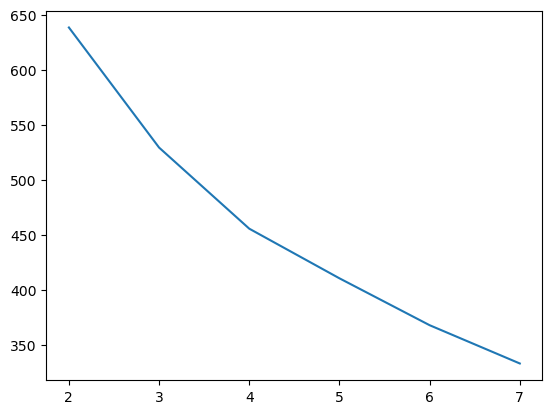

In [51]:
#Now getting the elbow curver# the one having least 

plt.plot(k_value,ssd)

In [55]:
kmodel=KMeans(n_clusters=4,max_iter=150,random_state=23)

In [57]:
kmodel.fit(df_scaled)

C:\Users\Anirudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Anirudh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=150, n_clusters=4, random_state=23)

In [58]:
#To verify to which labesl is it allotted
kmodel.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 0, 0, 0, 3, 0, 2, 3, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
df['ClusterID']=kmodel.labels_

In [61]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,ClusterID
0,SR Tendulkar (INDIA),448.7260,433.9196,41.0,14436.8928,200.0000,44.83,18208.6396,86.23,30.9196,93.1452,20.0000,22.0484,1
1,KC Sangakkara (Asia/ICC/SL),404.0000,380.0000,41.0,14234.0000,169.0000,41.98,18048.0000,78.86,25.0000,93.0000,15.0000,15.0000,1
2,RT Ponting (AUS/ICC),375.0000,365.0000,39.0,13704.0000,164.0000,42.03,17046.0000,80.39,30.0000,82.0000,20.0000,17.0000,1
3,ST Jayasuriya (Asia/SL),445.0000,433.0000,18.0,13430.0000,189.0000,32.36,14725.0000,91.20,28.0000,68.0000,30.1936,22.0000,1
4,DPMD Jayawardene (Asia/SL),448.0000,418.0000,39.0,12650.0000,144.0000,33.37,16020.0000,78.96,19.0000,77.0000,28.0000,17.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),145.1288,142.2256,13.0,5134.0000,133.0000,45.03,7908.0000,64.92,11.0000,31.0000,3.0000,16.0000,0
75,Misbah-ul-Haq (PAK),162.0000,149.0000,31.0,5122.0000,101.7096,43.40,6945.0000,73.75,1.9032,42.0000,6.0000,13.0000,0
76,PD Collingwood (ENG),197.0000,181.0000,37.0,5092.0000,120.0000,35.36,6614.0000,76.98,5.0000,26.0000,7.0000,10.0000,0
77,A Symonds (AUS),198.0000,161.0000,33.0,5088.0000,156.0000,39.75,5916.9944,92.44,6.0000,30.0000,15.0000,11.0000,0


In [ ]:
# so all tis cricketers are assigned labels